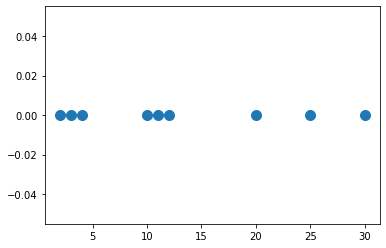

In [1]:
from __future__ import print_function
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

#from sklearn.metrics import silhouette_samples, silbouette_score
from pandas import DataFrame
from scipy.stats import entropy
from math import log, e
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import numpy as np 
import math
import timeit

X = np.array([[2,0],[3,0],[4,0],[10,0],[11,0],[12,0],[20,0],[25,0],[30,0]])
plt.scatter(X[:,0], X[:,1], s=100)
plt.show()

In [3]:
ks = range(1, 10)
SSE = []

for k in ks:
    model = KMeans(n_clusters = k).fit(X)
    SSE.append(model.inertia_)
SSE    

[798.0, 150.0, 54.0, 16.5, 4.0, 2.5, 1.0, 0.5, 0.0]

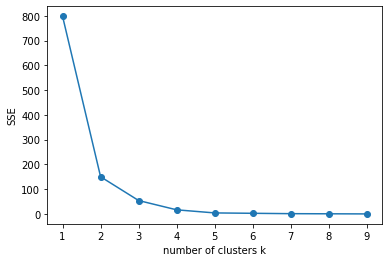

In [4]:
plt.plot(ks, SSE, '-o')
plt.xlabel('number of clusters k')
plt.ylabel('SSE')
plt.xticks(ks)
plt.show()

### 그래프를 보면서 k 정하기 

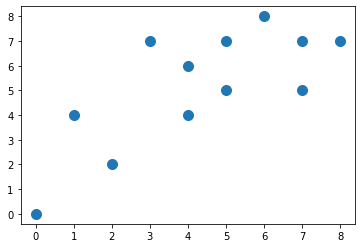

In [32]:
X = np.array([[7, 5], [5, 7], [7, 7], [4, 4], [4, 6], [1, 4],
              [0, 0], [2, 2], [8, 7], [6, 8], [5, 5], [3, 7]])
plt.scatter(X[:,0], X[:,1], s=100)
plt.show()

In [6]:
ks = range(1, 10)
SSE = []

for k in ks:
    model = KMeans(n_clusters = k).fit(X)
    SSE.append(model.inertia_)
SSE    

[130.33333333333334,
 45.777777777777786,
 26.349999999999998,
 18.849999999999998,
 12.916666666666666,
 8.833333333333332,
 6.0,
 3.5,
 2.5]

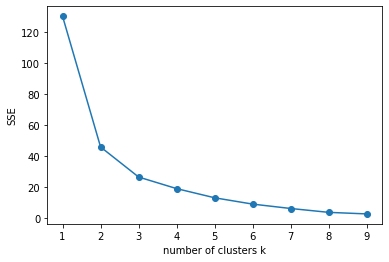

In [7]:
plt.plot(ks, SSE, '-o')
plt.xlabel('number of clusters k')
plt.ylabel('SSE')
plt.xticks(ks)
plt.show()

### 4를 잡을지 안잡을지 참 애매하다. 
##### 2를 기준으로 / 완만하게 잡고싶은 사람은 3

# ========================================

In [17]:
model2 = KMeans(n_clusters = 2, init='random', n_init=1,
                max_iter=10, random_state=1).fit(X)
c0, c1 = model2.cluster_centers_
c0, c1

(array([5.625, 6.5  ]), array([1.75, 2.5 ]))

In [11]:
model3 = KMeans(n_clusters = 3, init='random', n_init=1,
                max_iter=10, random_state=1).fit(X)
c0, c1, c2 = model3.cluster_centers_
c0, c1, c2

(array([7.  , 6.75]), array([1., 2.]), array([4.2, 5.8]))

In [12]:
model4 = KMeans(n_clusters = 4, init='random', n_init=1,
                max_iter=10, random_state=1).fit(X)
c0, c1, c2, c3 = model4.cluster_centers_
c0, c1, c2, c3

(array([7.  , 6.75]),
 array([1., 2.]),
 array([4.        , 6.66666667]),
 array([4.5, 4.5]))

In [21]:
model5 = KMeans(n_clusters = 5, init='random', n_init=1,
                max_iter=10, random_state=1).fit(X)
c0, c1, c2, c3, c4 = model5.cluster_centers_
c0, c1, c2, c3, c4

(array([7.33333333, 6.33333333]),
 array([1., 2.]),
 array([3.5, 6.5]),
 array([4.5, 4.5]),
 array([5.5, 7.5]))

In [24]:
model6 = KMeans(n_clusters = 6, init='random', n_init=1,
                max_iter=10, random_state=1).fit(X)
c0, c1, c2, c3, c4, c5 = model6.cluster_centers_
c0, c1, c2, c3, c4, c5

(array([7.33333333, 6.33333333]),
 array([1.5, 3. ]),
 array([3.5, 6.5]),
 array([4.5, 4.5]),
 array([5.5, 7.5]),
 array([0., 0.]))

# ===========================================

In [30]:
def separation(model1):
    total_mean=np.mean(X[:,0])
    m1 = np.mean(X[model1.labels_==0, 0])
    m2 = np.mean(X[model1.labels_==1, 0])
    m3 = np.mean(X[model1.labels_==2, 0])

    count1 = np.count_nonzero(X[model1.labels_==0, 0])
    count2 = np.count_nonzero(X[model1.labels_==1, 0])
    count3 = np.count_nonzero(X[model1.labels_==2, 0])
 
    separation = count1*(total_mean-m1)**2 + count2*(m2-total_mean)**2 +count3*(m3-total_mean)**2
    
    print(separation)

In [14]:
list1 = []
def s_matrix(model1):
    for i in range(0, np.count_nonzero(X)):
        list1.append([])
        for j in range(0, np.count_nonzero(X)):
            if model1.labels_[i] == model1.labels_[j]:
                list1[i].append(1)
            else:
                list1[i].append(0)

In [15]:
def entropy(labels):
    n_labels = len(labels)
    
    if n_labels <= 1:
        return 0
    
    counts = np.bincount(labels)
    probs = counts / n_labels
    n_classes = len(probs)
    
    if n_classes <= 1:
        return 0
    
    return - np.sum(probs*np.log(probs)/np.log(n_classes)) 

# ========================================

In [18]:
entropy(model2.labels_)

0.9182958340544896

In [19]:
entropy(model3.labels_)

0.9808340377961402

In [20]:
entropy(model4.labels_)

0.9795739585136224

In [23]:
entropy(model5.labels_)

0.9873179343530822

In [25]:
entropy(model6.labels_)

0.9756641375534825

# ========================================

In [26]:
separation(model2)

33.36805555555556


In [31]:
separation(model3)

50.75555555555556


In [43]:
def plot_cluster(model, c0, c1):
    plt.scatter(X[model.labels_==0, 0],
               X[model.labels_==0, 1], s=100, marker='v', c='r')
    plt.scatter(X[model.labels_==1, 0], 
               X[model.labels_==1, 1], s=100, marker='^', c='b')
 
    plt.scatter(c0[0], c0[1], s=200, c='r')
    plt.scatter(c1[0], c1[1], s=200, c='b')
  
    plt.show()

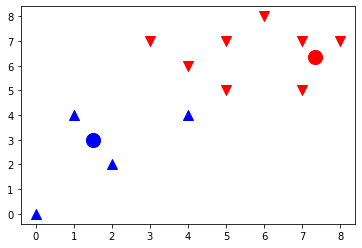

In [44]:
plot_cluster(model2, c0, c1)

In [45]:
def plot_cluster(model, c0, c1, c2):
    plt.scatter(X[model.labels_==0, 0],
               X[model.labels_==0, 1], s=100, marker='v', c='r')
    plt.scatter(X[model.labels_==1, 0], 
               X[model.labels_==1, 1], s=100, marker='^', c='b')
    plt.scatter(X[model.labels_==2, 0], 
               X[model.labels_==3,0], s=100, marker='o', c='g')
    plt.scatter(c0[0], c0[1], s=200, c='r')
    plt.scatter(c1[0], c1[1], s=200, c='b')
    plt.scatter(c2[0] ,c2[1], s=200, c='g')
    plt.show()

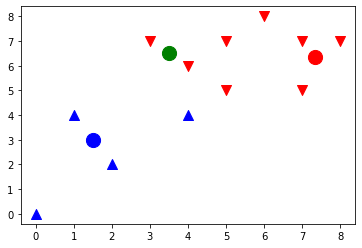

In [46]:
plot_cluster(model2, c0, c1, c2)